<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import requests # Импортируем библиотеку requests для задания 5.7
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup для задания 5.7
import matplotlib.pyplot as plt

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

import configparser

config = configparser.ConfigParser()
config.read("db_settings.ini")

# Чтобы не забыть в конце проекта удалить эту ячейку сделал настройки в отдельном файле и добавил файл в .gitignore

['db_settings.ini']

In [3]:

dbname=config['DB']['DBNAME']
user=config['DB']['USER']
host=config['DB']['HOST']
password=config['DB']['PASSWORD']
port=config['DB']['PORT']
connection = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# aqlalchemy и такой connection, чтоб не выдавало предупреждений

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
            SELECT 
                count(*) as vac_cnt
            FROM 
                vacancies 
            '''

In [5]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
display(df_3_1)

,vac_cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
            SELECT 
                count(*) as emp_cnt
            FROM 
                employers 
            '''

In [7]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_3_2)

,emp_cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
            SELECT 
                count(*) as area_cnt
            FROM 
                areas 
            '''

In [9]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_3_3)

,area_cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
            SELECT 
                count(*) as ind_cnt
            FROM 
                industries 
            '''

In [11]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_3_4)

,ind_cnt
0,294


***

In [12]:
# выводы по предварительному анализу данных

*Большое количество сфер деятельности , большой охват регионов, много работодателей и вакансий. При знакомстве с количествами выглядит как достаточно хороший набор разнообразных данных для обучения модели.*

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''
            SELECT 
                a.name AS area,
                count(v.id) AS cnt
            FROM 
                vacancies AS v
                JOIN areas AS a ON a.id = v.area_id
            GROUP BY area
            ORDER BY cnt DESC
            '''

In [14]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
display(df_4_1)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''
            SELECT
                count(*) AS not_null_salary
            FROM 
                vacancies
            WHERE salary_from IS NOT null or salary_to IS NOT null
            '''

In [16]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
display(df_4_2)

,not_null_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''
            SELECT
                round(avg(salary_from)) AS avg_from,
                round(avg(salary_to)) AS avg_to
            FROM 
                vacancies
            '''

In [18]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
display(df_4_3)

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''
            SELECT
                schedule,
                employment,
                COUNT(id) AS cnt
            FROM 
                vacancies
            GROUP BY schedule, employment
            ORDER BY cnt DESC
            '''

In [20]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
display(df_4_4)

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''
            SELECT
                experience,
                COUNT(id) AS cnt
            FROM 
                vacancies
            GROUP BY experience
            ORDER BY cnt
            '''

In [22]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5)

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

,area,cnt
0,Мурманск,100
1,Череповец,99
2,Архангельск,99
3,Петрозаводск,97
4,Йошкар-Ола,97
...,...,...
695,Фокино (Приморский край),1
696,Большие Вязёмы,1
697,Навашино,1
698,Вуктыл,1


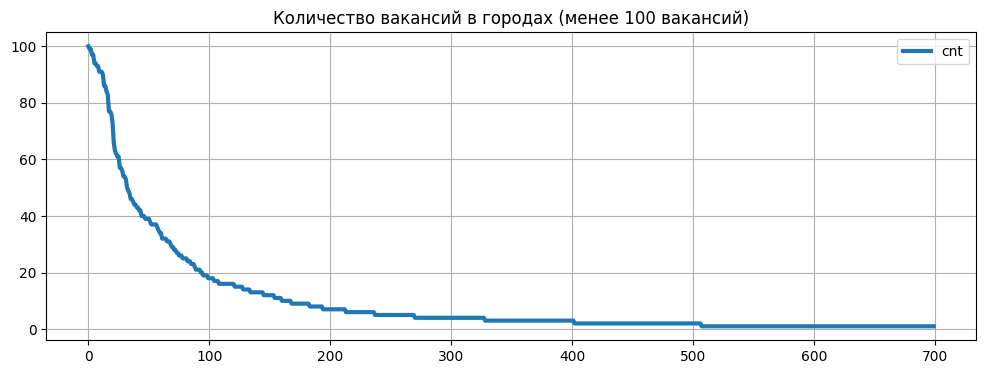

In [23]:
# выводы по детальному анализу вакансий
# сделаем дополнительный запрос
query_dop = f'''
            SELECT 
                a.name AS area,
                count(v.id) AS cnt
            FROM 
                vacancies AS v
                JOIN areas AS a ON a.id = v.area_id
            GROUP BY area
            HAVING count(v.id) <= 100
            ORDER BY cnt DESC
            '''
            
# результат запроса
df_dop = pd.read_sql_query(query_dop, connection)
display(df_dop)

# график для наглядности
plot = df_dop.plot(
    kind='line',
    figsize=(12, 4),
    title='Количество вакансий в городах (менее 100 вакансий)',
    grid = True,
    lw=3
)


*Распределение количества объявлений по опыту работы выглядит логично. От 6 лет - это скорее всего вакансии для senior или руководители и управленцы, отсюда их и меньше всего, а оптимальный опыт для начинающих специалистов от 1 до 3 и от 3 до 6 лет на 1 и втором месте соответственно (4/5 от всех объявлений).*

*Для обучения модели в моем представлении не очень хорошо, что 2/3 вакансий требуют полный рабочий день и полную занятость, но тут хорошо бы изучать поисковые запросы ваккансий возможно этот перекос и будет незначителен, если ищут больше вакансий с полной занятостью.*

*Около половины вакансий не имеют указания по зарплате, что достаточно плохо, если обчать модель без очищения выгрузки.*

*По доп запросу видно, что менее 100 вакнсий у 699 регионов, получается только 70 регионов имеют более 100 вакансий. По графику выше видно, что есть смысл рассматривать к первым 70 регионам еще окло 50-100, далее объявлений становится меньше 20 на регион*

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''
            SELECT
                e.name,
                COUNT(v.id) AS cnt
            FROM 
                vacancies AS v
                JOIN employers AS e ON v.employer_id=e.id
            GROUP BY e.name
            ORDER BY cnt DESC
            LIMIT 5
            '''

In [25]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
display(df_5_1)

,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f'''
            SELECT
                vac.name,
                vac.vac_cnt,
                emp.emp_cnt
            FROM(
                SELECT 
                    a.id,
                    a.name,
                    COUNT(v.id) AS vac_cnt
                FROM 
                    areas AS a
                    LEFT JOIN vacancies AS v ON v.area_id = a.id
                GROUP BY a.id, a.name
                ) AS vac
                JOIN(
                    SELECT 
                        a.id,
                        a.name,
                        COUNT(e.id) AS emp_cnt
                    FROM 
                        areas AS a
                        LEFT JOIN employers AS e ON e.area = a.id
                    GROUP BY a.id, a.name
                    ) AS emp ON emp.id = vac.id
            ORDER BY vac.vac_cnt, emp.emp_cnt DESC
            '''

# Далее более читаемое, но выполнялось гораздо дольше, поэтому остановился на варианте выше
            
# query_5_2 = f'''
#             SELECT 
#                 a.id,
#                 a.name,
#                 COUNT(v.id) AS vac_cnt,
#                 COUNT(e.id) AS emp_cnt
#             FROM 
#                 areas AS a
#                 LEFT JOIN vacancies AS v ON v.area_id = a.id
#                 LEFT JOIN employers AS e ON e.area = a.id
#             GROUP BY a.id, a.name
#             ORDER BY vac_cnt, emp_cnt DESC
#             '''            
            
            

In [27]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
display(df_5_2)

,name,vac_cnt,emp_cnt
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
1357,Алматы,1892,721
1358,Новосибирск,2006,573
1359,Минск,2112,1115
1360,Санкт-Петербург,2851,2217


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''
            SELECT 
                e.name,
                COUNT(DISTINCT v.area_id) AS area_cnt
            FROM 
                employers AS e
                JOIN vacancies AS v ON e.id = v.employer_id
            GROUP BY e.name
            ORDER BY area_cnt DESC
            '''            

In [29]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
display(df_5_3)

,name,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''
            SELECT
                COUNT(DISTINCT e.id) as ind_is_null
            FROM 
                employers AS e
                LEFT JOIN employers_industries AS e_i ON e.id = e_i.employer_id
                LEFT JOIN industries AS i ON e_i.industry_id = i.id
            WHERE i.name IS NULL
            '''        

In [31]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
display(df_5_4)

,ind_is_null
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
query_5_5 = f'''
            SELECT
                e.name,
                COUNT(i.id) AS cnt
            FROM 
                employers AS e
                LEFT JOIN employers_industries AS e_i ON e.id = e_i.employer_id
                LEFT JOIN industries AS i ON e_i.industry_id = i.id
            GROUP BY e.name
            HAVING COUNT(i.id) = 4
            ORDER BY e.name
            OFFSET 2
            LIMIT 1
            '''        

In [33]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
display(df_5_5)

,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''
            SELECT
                COUNT(DISTINCT e.id) AS cnt
            FROM 
                employers AS e
                LEFT JOIN employers_industries AS e_i ON e.id = e_i.employer_id
                LEFT JOIN industries AS i ON e_i.industry_id = i.id
            WHERE i.name = 'Разработка программного обеспечения'
            '''        

In [35]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
display(df_5_6)

,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
table = page.find_all('table')[1] # Обращаемся к нужной таблице

table_data = []

for tr in table.findAll('tr'): # Ищем в таблице строки с тегом tr
    city = []
    for a in tr.findAll('a'): # в строках ищем тег a и добавляем в список
        city.append(a.text)
    table_data.append(city)
    
cities = tuple([i[0] for i in table_data[1:]]) # содаем кортеж для запроса, убирая мусорные данные
display(cities)

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [37]:
# текст запроса
query_5_7 = f'''
            (SELECT
                a.name,
                COUNT(v.id) AS cnt
            FROM 
                areas AS a
                JOIN vacancies AS v ON v.area_id = a.id
                JOIN employers AS e ON e.id = v.employer_id
            WHERE a.name IN {cities} AND e.name = 'Яндекс'
            GROUP BY a.name)
        UNION
            (SELECT
                'Total',
                COUNT(v.id)
            FROM
                areas AS a
                JOIN vacancies AS v ON v.area_id = a.id
                JOIN employers AS e ON e.id = v.employer_id
            WHERE a.name IN {cities} AND e.name = 'Яндекс')
            ORDER BY cnt
            '''      

In [38]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
display(df_5_7)

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

In [39]:
# выводы по анализу работодателей

# сделаем дополнительное условие для регионов работодателей
df_dop2 = df_5_2[(df_5_2['vac_cnt'] == 0) & (df_5_2['emp_cnt'] != 0)]
display(df_dop2) # Если применить функцию .head(50), то увидим в первых 50 строках восновном области России

,name,vac_cnt,emp_cnt
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
181,Португалия,0,1
182,Эквадор,0,1
183,Чеченская республика,0,1
184,Северо-Курильск,0,1


*Логично, что крупная Российская IT-компания на первом месте по количеству вакансий в IT.*

*Регионы, в которых нет вакансий, но есть работодатели при обработке данных для обучения хорошо бы привести к чему-то более похожему на правду, например, области России и "Россия" заменить на города, где больше всего вакансий у конкретного работодателя(особенно, если город соответствует области работодателя).*

*Вакансии Яндекса во всех городах миллионниках примерно в одинаковых количествах. Возможно есть офисы во всех городах, удаленка и возможности к релокации нужных специалистов.*

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
query_6_1 = f'''
            SELECT
                COUNT(id)
            FROM 
                vacancies
            WHERE name ILIKE '%%data%%' OR name ILIKE '%%данн%%'
            '''           

In [41]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
display(df_6_1)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
query_6_2 = f'''
            SELECT 
                COUNT(id)
            FROM 
                vacancies
            WHERE ((name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%')
                    AND
                (name ILIKE '%%junior%%' 
                OR experience ILIKE '%%нет опыта%%' 
                OR employment ILIKE '%%стажировка%%') 
            '''         

In [43]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
display(df_6_2)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
# текст запроса
query_6_3 = f'''
            SELECT 
                COUNT(id)
            FROM 
                vacancies
            WHERE ((name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%') 
                    AND
                (key_skills ILIKE '%%SQL%%' OR key_skills ILIKE '%%postgres%%')
            '''
            
            

In [45]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
display(df_6_3)

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
# текст запроса
query_6_4 = f'''
            SELECT
                COUNT(id)
            FROM 
                vacancies
            WHERE ((name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%')
                    AND
                (key_skills ILIKE '%%python%%')
            '''

In [47]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
display(df_6_4)

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# текст запроса
query_6_5 = f'''
            SELECT
                ROUND(AVG(length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1), 2) as k
            FROM 
                vacancies
            WHERE (name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%'
            '''

In [49]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
display(df_6_5)

,k
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
# текст запроса
query_6_6 = f'''
            SELECT
                distinct experience,
                ROUND(AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2),0)
            FROM 
                vacancies
            WHERE ((name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%')
                    AND 
                (salary_from IS NOT NULL 
                OR salary_to IS NOT NULL)
                --    AND
                --experience = 'От 3 до 6 лет'
            GROUP BY experience
            '''

In [51]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
display(df_6_6)

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [52]:
# выводы по предметному анализу

# сделаем дополнительный запрос
query_dop3= f'''
            SELECT
                count(*)
            FROM 
                vacancies
            WHERE ((name LIKE '%%ML%%' and name NOT ILIKE '%%html%%') 
                OR name ILIKE '%%data scientist%%'
                OR name ILIKE '%%data science%%'
                OR name ILIKE '%%исследователь данных%%'
                OR name ILIKE '%%machine learning%%'
                OR name ILIKE '%%машинн%%обучен%%')
                    AND
                (key_skills NOT ILIKE '%%python%%'  
                AND 
                key_skills NOT ILIKE '%%sql%%')
            '''
            
# результат запроса
df_dop3 = pd.read_sql_query(query_dop3, connection)
display(df_dop3)

,count
0,53


*Большая часть вакансий по направлению Data Science требует ключевые навыки SQL и Python, что вполне логично. Всего 53 вакансии в этом направлении не требуют этих навыков как ключевые.*

*В среднем по 6 навыков указано к вакансиям по направлению Data Science, что говорит о том что направление не ограничивается только SQL и Python.*

***

# Общий вывод по проекту

In [53]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

*На первый взгляд данные казались объемными и полезными. Чем больше углублялись в изучение данных тем больше было понимание, что их нужно очищать.*

*Хорошо бы повнимательнее изучить ключевые навыки к направлению Data Science, возмождно и по навыкам найдутся выбросы.*

*Указывал ранее что регионы так же нуждаются в чистке и дополнении/замене данных там где это требуется.*

*На мой взгляд для обучения модели полезных данных маловато и уж точно их нужно очистить.*